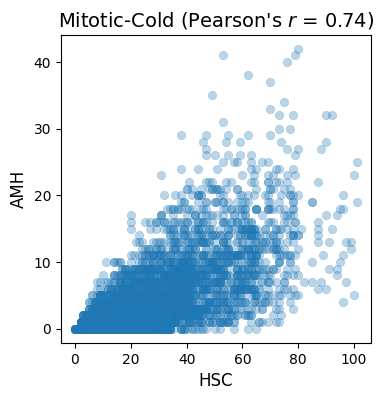

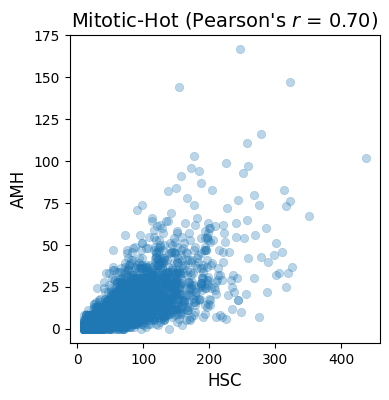

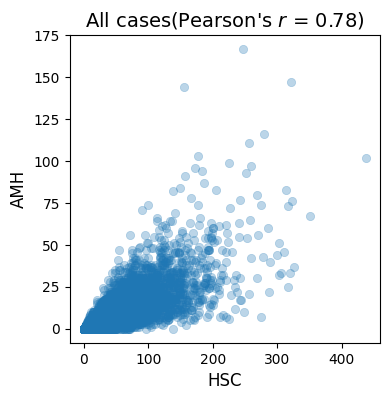

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import featre_to_tick
save_root = "results_final_all/morphology/correlations/"
os.makedirs(save_root, exist_ok=True)

feat1 = 'mit_hotspot_count'
feat2 = 'aty_hotspot_count'
corr = "pearson"

for temp in ["Cold", "Hot", "All"]:

    # Calculate the correlation between two columns
    df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer_withAtypical.csv")
    df["type"] = df["type"].replace(["GBM", "LGG"], "GBMLGG")
    df["type"] = df["type"].replace(["COAD", "READ"], "COADREAD")
    # df = df[df["type"].isin(['BRCA'])]
    # df = df[df["mit_hotspot_count"]>50]
    if temp in ["Hot", "Cold"]:
        df = df[df["temperature"]==temp]
    # Calculate the correlation between two columns
    correlation_value = df[feat1].corr(df[feat2], method=corr)

    # Create a scatter plot
    plt.figure(figsize=(4, 4))
    sns.scatterplot(x=feat1, y=feat2, data=df, alpha=0.3, edgecolor=None)
    plt.xlabel(featre_to_tick(feat1), fontsize=12)
    plt.ylabel(featre_to_tick(feat2), fontsize=12)
    # Set the title with the correlation value
    title = f"Mitotic-{temp} " if temp in ["Hot", "Cold"] else "All cases"
    corr_title = r"(Spearman's $\rho$" if corr == "spearman" else r"(Pearson's $r$"
    plt.title(title + corr_title + f" = {correlation_value:.2f})", fontsize=14)
    plt.savefig(save_root + f"{corr}_{featre_to_tick(feat1)}_{featre_to_tick(feat2)}_{temp.lower()}.png", dpi=600, bbox_inches = 'tight', pad_inches = 0.01)
    # Display the plot
    plt.show()

In [2]:
import pandas as pd

# Example DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # If you're loading from a CSV
df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer_withAtypical.csv")

# Group by 'type' and sum the OS, PFI, DSS, and DFI columns
grouped = df.groupby('type').agg({
    'OS': 'sum',
    'PFI': 'sum',
    'DSS': 'sum',
    'DFI': 'sum',
    'type': 'size'  # Count the number of rows for each type
}).rename(columns={'type': 'count'})

# Sort by the count in descending order
sorted_grouped = grouped.sort_values(by='count', ascending=False)

# Print the results
print(sorted_grouped)


             OS    PFI    DSS    DFI  count
type                                       
BRCA      146.0  139.0   79.0   81.0   1054
GBMLGG    442.0  510.0  399.0   22.0    873
COADREAD  122.0  155.0   76.0   30.0    589
KIRC      171.0  155.0  109.0   14.0    512
UCEC       81.0  115.0   54.0   52.0    505
LUSC      205.0  138.0   84.0   59.0    478
LUAD      166.0  191.0  105.0   87.0    467
HNSC      208.0  181.0  121.0   24.0    450
THCA       14.0   47.0    7.0   24.0    437
SKCM      189.0  279.0  164.0    0.0    432
BLCA      174.0  165.0  118.0   31.0    385
STAD      145.0  131.0   95.0   45.0    375
LIHC      128.0  180.0   80.0  144.0    364
PRAD        9.0   58.0    4.0   19.0    342
KIRP       41.0   57.0   27.0   27.0    273
CESC       65.0   63.0   49.0   24.0    269
SARC       87.0  120.0   71.0   59.0    227
PAAD      100.0  109.0   79.0   22.0    183
ESCA       66.0   75.0   46.0   21.0    154
PCPG        4.0   13.0    2.0    3.0    146
TGCT        2.0   33.0    2.0   

In [13]:
sorted_grouped = grouped.sort_values(by=['DFI', 'count', ], ascending=False)

# Print the results
print(sorted_grouped)

             OS    PFI    DSS    DFI  count
type                                       
LIHC      128.0  180.0   80.0  144.0    364
LUAD      166.0  191.0  105.0   87.0    467
BRCA      146.0  139.0   79.0   81.0   1054
LUSC      205.0  138.0   84.0   59.0    478
SARC       87.0  120.0   71.0   59.0    227
UCEC       81.0  115.0   54.0   52.0    505
STAD      145.0  131.0   95.0   45.0    375
BLCA      174.0  165.0  118.0   31.0    385
COADREAD  122.0  155.0   76.0   30.0    589
KIRP       41.0   57.0   27.0   27.0    273
TGCT        2.0   33.0    2.0   27.0    121
OV         72.0   70.0   57.0   26.0    106
HNSC      208.0  181.0  121.0   24.0    450
THCA       14.0   47.0    7.0   24.0    437
CESC       65.0   63.0   49.0   24.0    269
GBMLGG    442.0  510.0  399.0   22.0    873
PAAD      100.0  109.0   79.0   22.0    183
ESCA       66.0   75.0   46.0   21.0    154
PRAD        9.0   58.0    4.0   19.0    342
KIRC      171.0  155.0  109.0   14.0    512
CHOL       17.0   21.0   16.0   

In [15]:
sorted_grouped.head(21).index

Index(['LIHC', 'LUAD', 'BRCA', 'LUSC', 'SARC', 'UCEC', 'STAD', 'BLCA',
       'COADREAD', 'KIRP', 'TGCT', 'OV', 'HNSC', 'THCA', 'CESC', 'GBMLGG',
       'PAAD', 'ESCA', 'PRAD', 'KIRC', 'CHOL'],
      dtype='object', name='type')

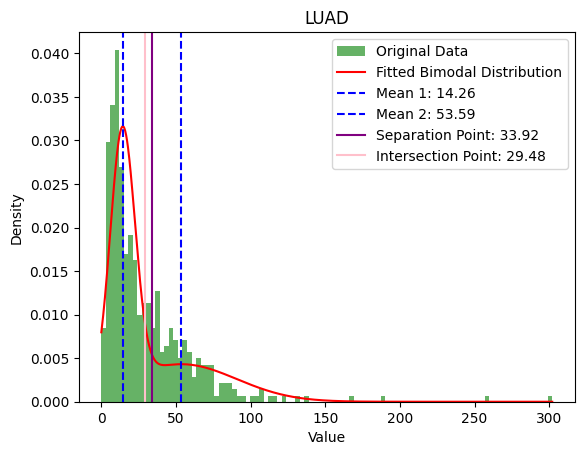

Mean 1: 14.26
Mean 2: 53.59
Separation Point: 33.92
Intersection Point: 29.48
Meadian Point: 20.00


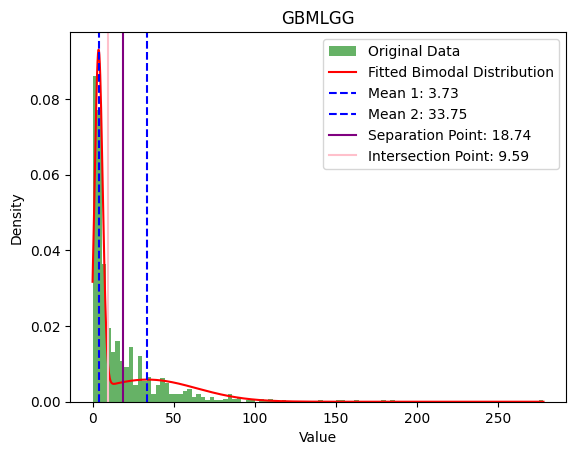

Mean 1: 3.73
Mean 2: 33.75
Separation Point: 18.74
Intersection Point: 9.59
Meadian Point: 7.00


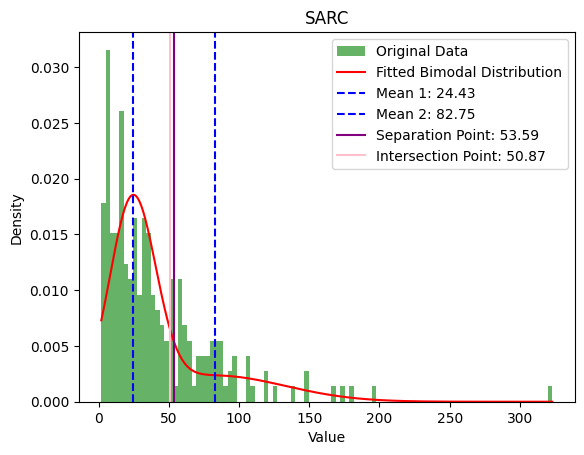

Mean 1: 24.43
Mean 2: 82.75
Separation Point: 53.59
Intersection Point: 50.87
Meadian Point: 31.00


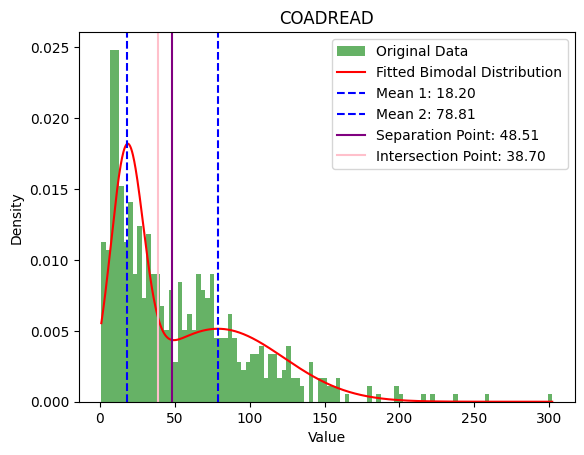

Mean 1: 18.20
Mean 2: 78.81
Separation Point: 48.51
Intersection Point: 38.70
Meadian Point: 39.00


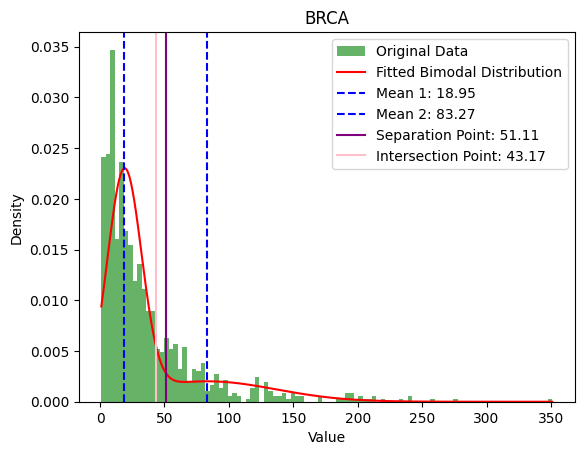

Mean 1: 18.95
Mean 2: 83.27
Separation Point: 51.11
Intersection Point: 43.17
Meadian Point: 22.00


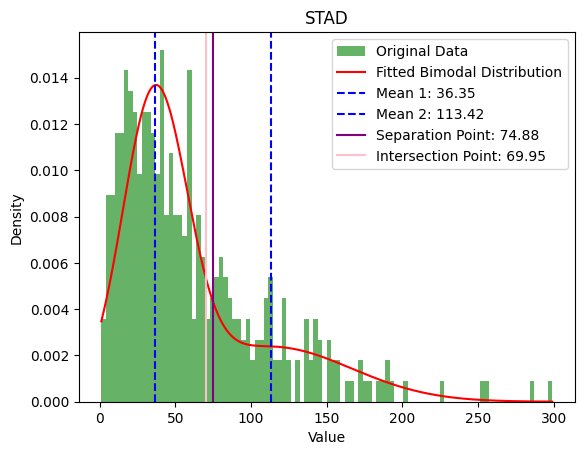

Mean 1: 36.35
Mean 2: 113.42
Separation Point: 74.88
Intersection Point: 69.95
Meadian Point: 47.00


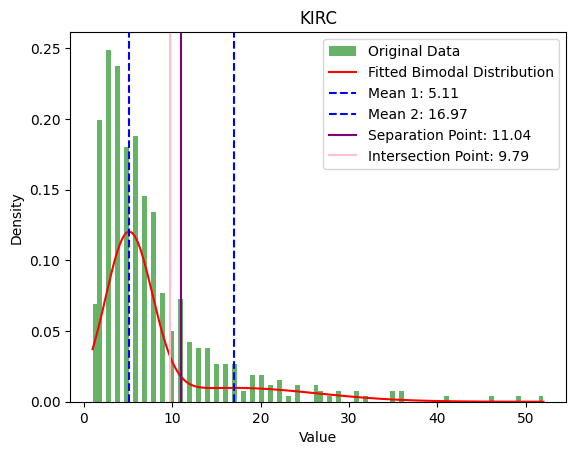

Mean 1: 5.11
Mean 2: 16.97
Separation Point: 11.04
Intersection Point: 9.79
Meadian Point: 6.00


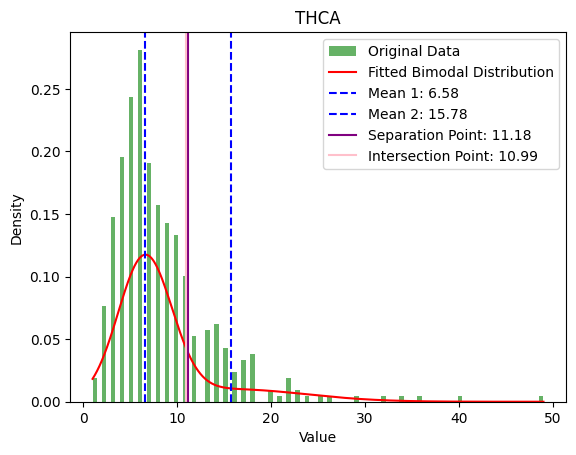

Mean 1: 6.58
Mean 2: 15.78
Separation Point: 11.18
Intersection Point: 10.99
Meadian Point: 7.00


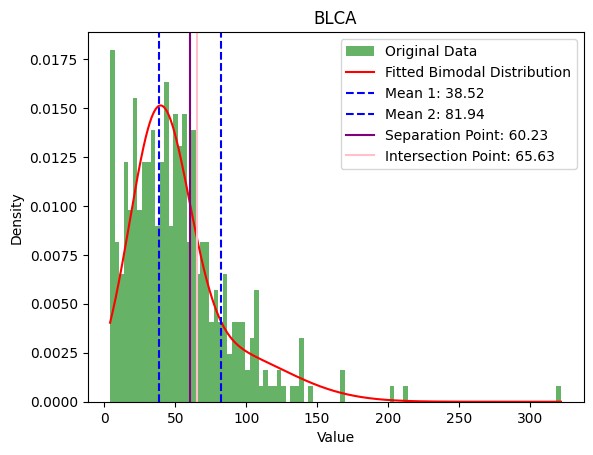

Mean 1: 38.52
Mean 2: 81.94
Separation Point: 60.23
Intersection Point: 65.63
Meadian Point: 46.00


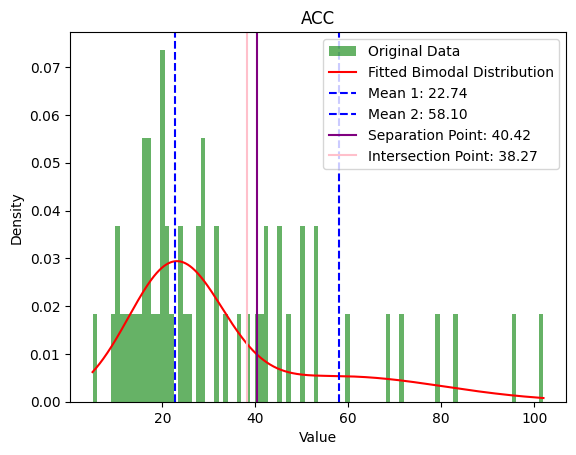

Mean 1: 22.74
Mean 2: 58.10
Separation Point: 40.42
Intersection Point: 38.27
Meadian Point: 27.00


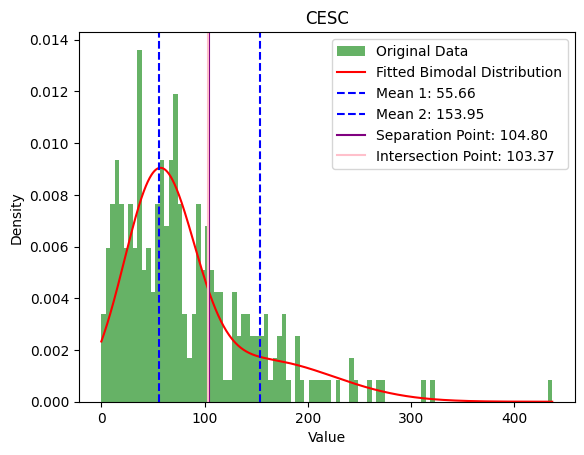

Mean 1: 55.66
Mean 2: 153.95
Separation Point: 104.80
Intersection Point: 103.37
Meadian Point: 69.00


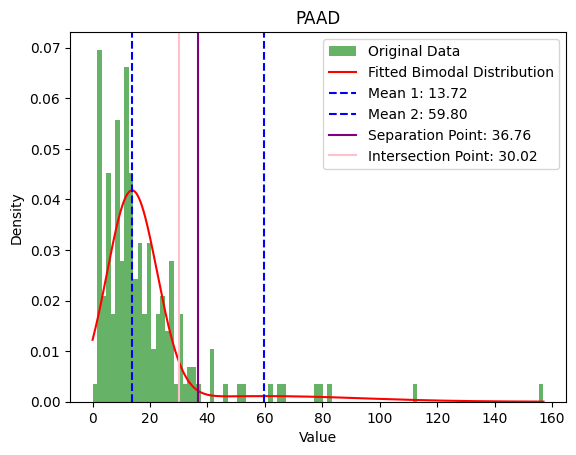

Mean 1: 13.72
Mean 2: 59.80
Separation Point: 36.76
Intersection Point: 30.02
Meadian Point: 13.00


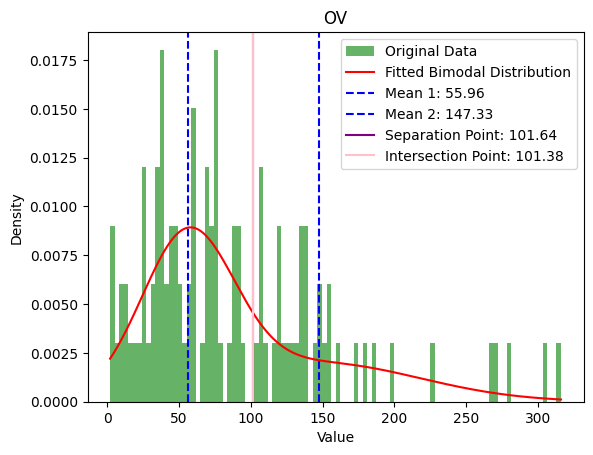

Mean 1: 55.96
Mean 2: 147.33
Separation Point: 101.64
Intersection Point: 101.38
Meadian Point: 73.50


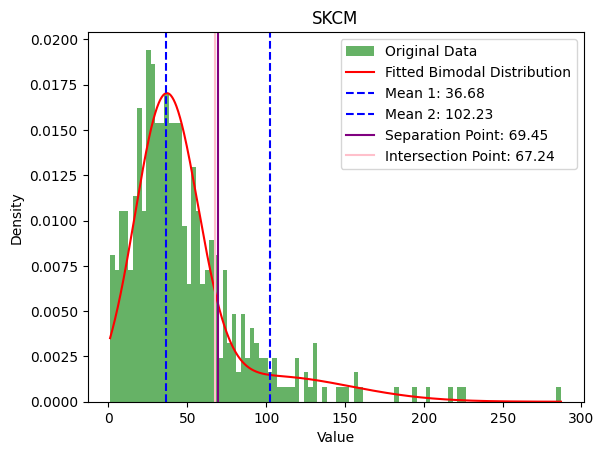

Mean 1: 36.68
Mean 2: 102.23
Separation Point: 69.45
Intersection Point: 67.24
Meadian Point: 40.00


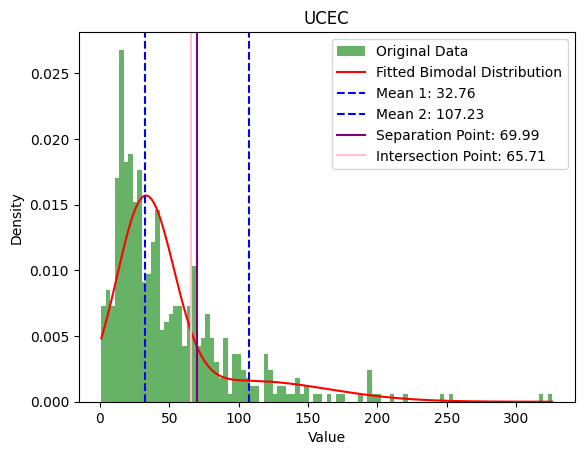

Mean 1: 32.76
Mean 2: 107.23
Separation Point: 69.99
Intersection Point: 65.71
Meadian Point: 36.00


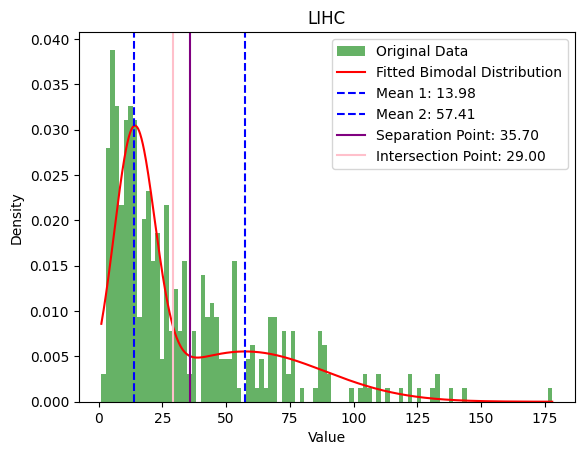

Mean 1: 13.98
Mean 2: 57.41
Separation Point: 35.70
Intersection Point: 29.00
Meadian Point: 22.00


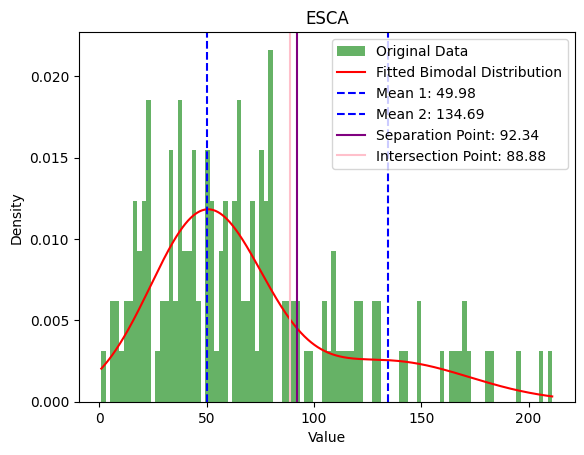

Mean 1: 49.98
Mean 2: 134.69
Separation Point: 92.34
Intersection Point: 88.88
Meadian Point: 63.00


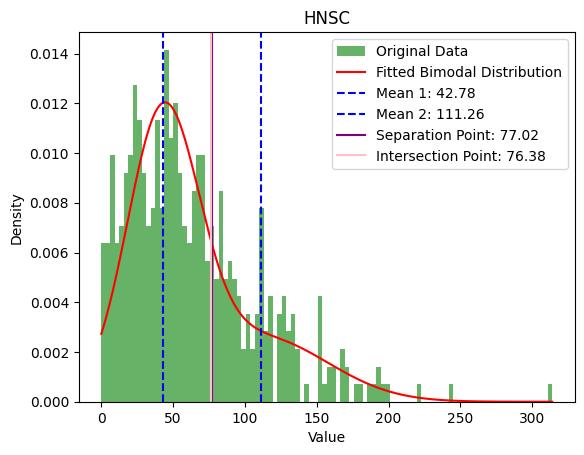

Mean 1: 42.78
Mean 2: 111.26
Separation Point: 77.02
Intersection Point: 76.38
Meadian Point: 53.50


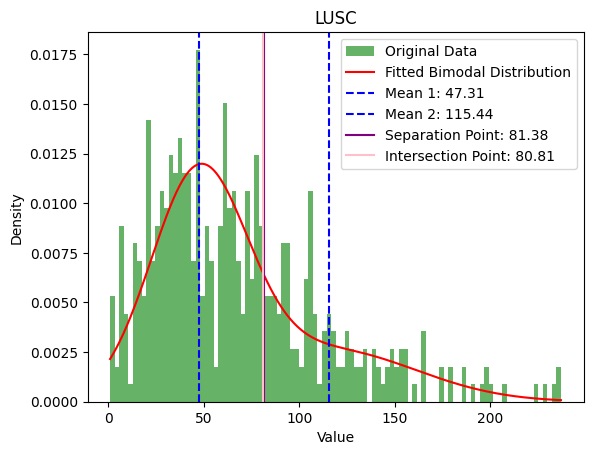

Mean 1: 47.31
Mean 2: 115.44
Separation Point: 81.38
Intersection Point: 80.81
Meadian Point: 60.00


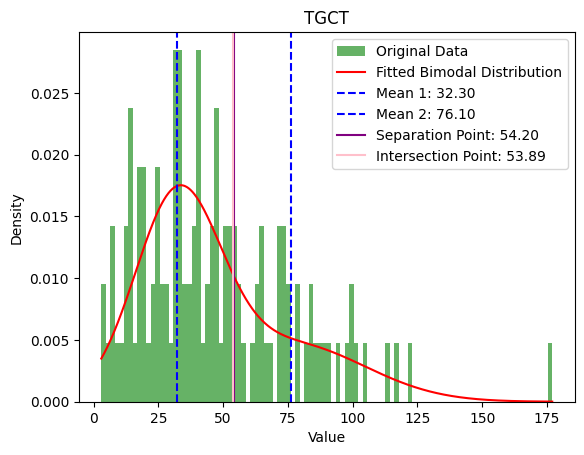

Mean 1: 32.30
Mean 2: 76.10
Separation Point: 54.20
Intersection Point: 53.89
Meadian Point: 41.00


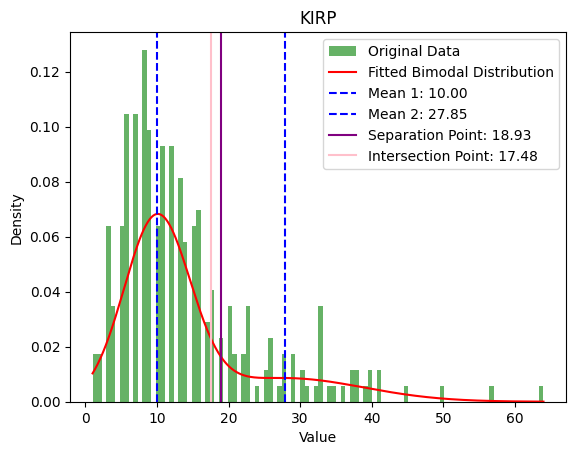

Mean 1: 10.00
Mean 2: 27.85
Separation Point: 18.93
Intersection Point: 17.48
Meadian Point: 12.00


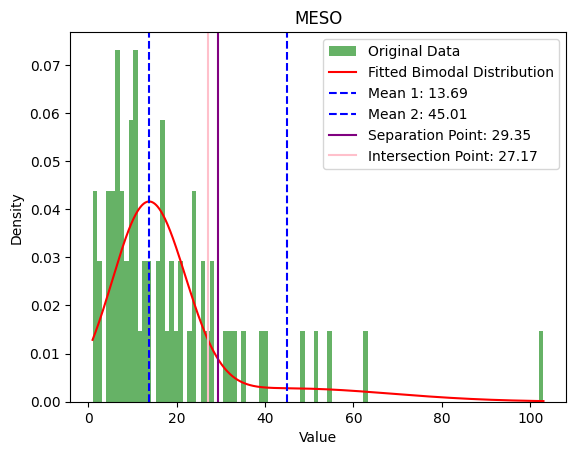

Mean 1: 13.69
Mean 2: 45.01
Separation Point: 29.35
Intersection Point: 27.17
Meadian Point: 14.00


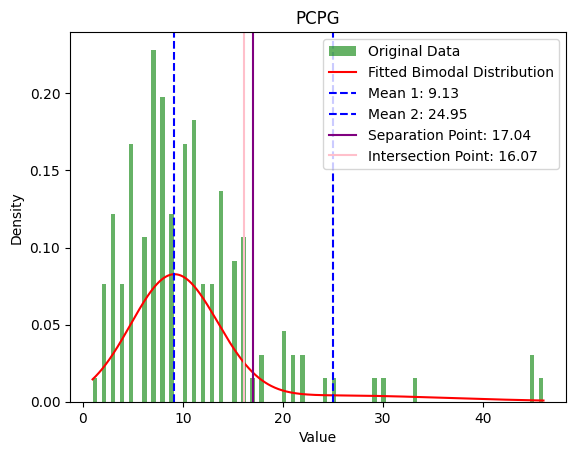

Mean 1: 9.13
Mean 2: 24.95
Separation Point: 17.04
Intersection Point: 16.07
Meadian Point: 9.50


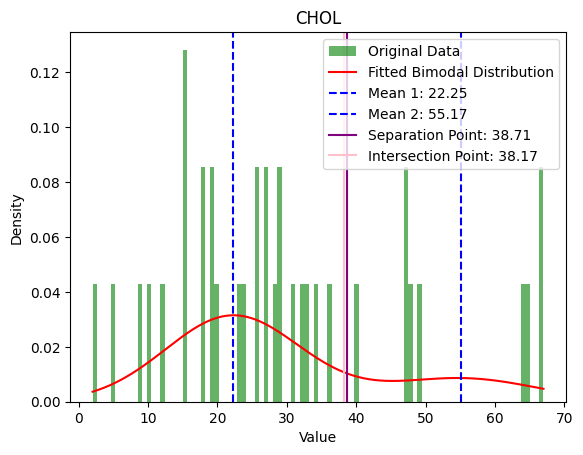

Mean 1: 22.25
Mean 2: 55.17
Separation Point: 38.71
Intersection Point: 38.17
Meadian Point: 27.00


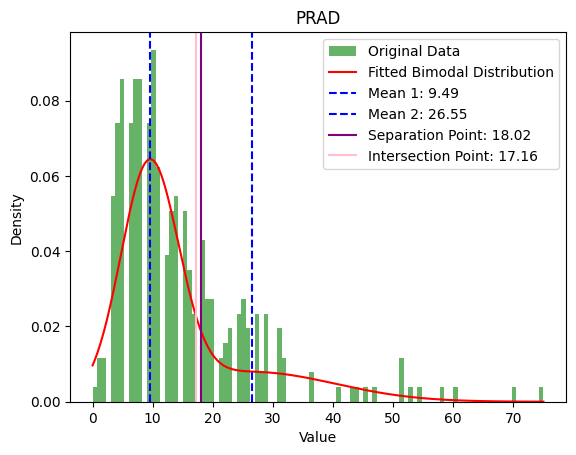

Mean 1: 9.49
Mean 2: 26.55
Separation Point: 18.02
Intersection Point: 17.16
Meadian Point: 11.00


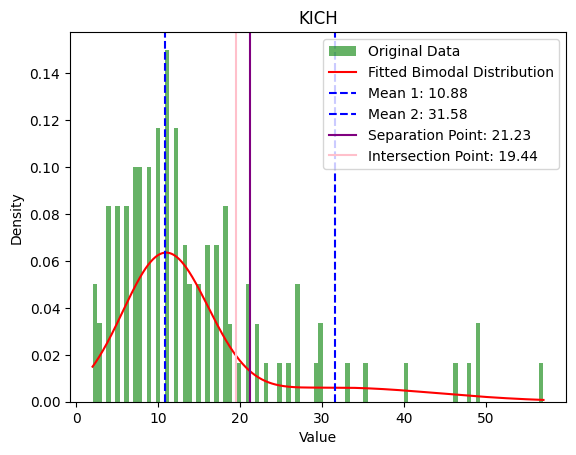

Mean 1: 10.88
Mean 2: 31.58
Separation Point: 21.23
Intersection Point: 19.44
Meadian Point: 12.00


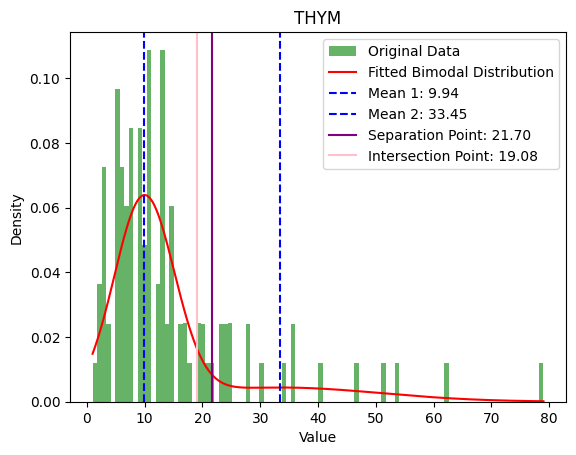

Mean 1: 9.94
Mean 2: 33.45
Separation Point: 21.70
Intersection Point: 19.08
Meadian Point: 11.00


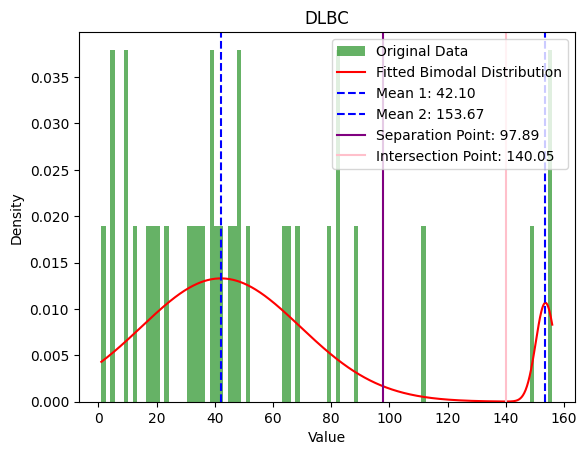

Mean 1: 42.10
Mean 2: 153.67
Separation Point: 97.89
Intersection Point: 140.05
Meadian Point: 41.50


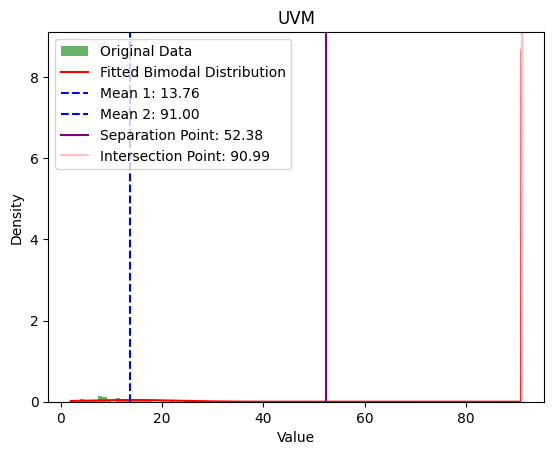

Mean 1: 13.76
Mean 2: 91.00
Separation Point: 52.38
Intersection Point: 90.99
Meadian Point: 11.00


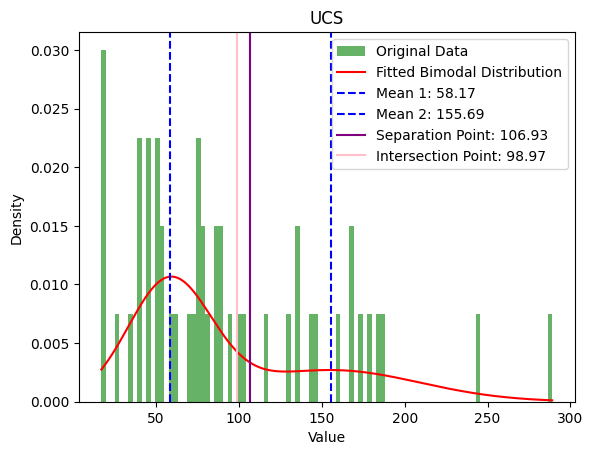

Mean 1: 58.17
Mean 2: 155.69
Separation Point: 106.93
Intersection Point: 98.97
Meadian Point: 77.00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer_withAtypical.csv")
df["type"] = df["type"].replace(["GBM", "LGG"], "GBMLGG")
df["type"] = df["type"].replace(["COAD", "READ"], "COADREAD")
cancer_list = list(df["type"].unique())

def find_cut_off(data, round_it=True):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    if round_it:
        separation_point = np.round(separation_point)

    return separation_point
    
for cancer_type in cancer_list:
    # Select the specific column
    data = df[df["type"]==cancer_type]
    # data.plot.scatter(x='aty_hotspot_ratio',
    #                   y='aty_wsi_ratio',
    #                   c='DarkBlue')
    # plt.figure()
    data = data['mit_hotspot_count'].values.reshape(-1, 1) # mit_hotspot_count
    
    # Fit a Gaussian Mixture Model (GMM) to the data with 2 components (for bimodal)
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    # Get the means and variances of the two Gaussian components
    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    mean1, mean2 = np.sort(means)
    var1, var2 = variances[np.argsort(means)]

    # Solve for the intersection of the two Gaussian distributions
    a = 1/(2*var1) - 1/(2*var2)
    b = mean2/var2 - mean1/var1
    c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

    # The quadratic formula to find the intersection points
    roots = np.roots([a, b, c])
    intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0]

    # Generate values for plotting the fitted bimodal distribution
    x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
    logprob = gmm.score_samples(x)
    pdf = np.exp(logprob)

    # Plot original data distribution as a histogram
    plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Original Data')

    # Plot the fitted bimodal distribution
    plt.plot(x, pdf, 'r-', label='Fitted Bimodal Distribution')

    # Plot the means of the two distributions as vertical lines
    plt.axvline(mean1, color='blue', linestyle='--', label=f'Mean 1: {mean1:.2f}')
    plt.axvline(mean2, color='blue', linestyle='--', label=f'Mean 2: {mean2:.2f}')

    # Plot the separation point as a vertical line
    plt.axvline(separation_point, color='purple', linestyle='-', label=f'Separation Point: {separation_point:.2f}')
    plt.axvline(intersection_point, color='pink', linestyle='-', label=f'Intersection Point: {intersection_point:.2f}')

    # Add labels and legend
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(cancer_type)
    plt.legend()

    # Show the plot
    plt.show()

    # Print the means and separation point
    print(f"Mean 1: {mean1:.2f}")
    print(f"Mean 2: {mean2:.2f}")
    print(f"Separation Point: {separation_point:.2f}")
    print(f"Intersection Point: {intersection_point:.2f}")
    print(f"Meadian Point: {np.median(data):.2f}")

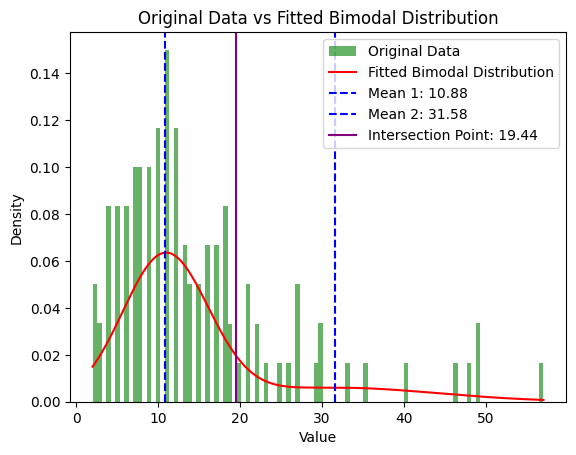

Mean 1: 10.88
Mean 2: 31.58
Intersection Point: 19.44


In [19]:
# Fit a Gaussian Mixture Model (GMM) to the data with 2 components (for bimodal)
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# Get the means and variances of the two Gaussian components
means = gmm.means_.flatten()
variances = gmm.covariances_.flatten()
mean1, mean2 = np.sort(means)
var1, var2 = variances[np.argsort(means)]

# Solve for the intersection of the two Gaussian distributions
a = 1/(2*var1) - 1/(2*var2)
b = mean2/var2 - mean1/var1
c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

# The quadratic formula to find the intersection points
roots = np.roots([a, b, c])
intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0]  # Take the root between the means

# Generate values for plotting the fitted bimodal distribution
x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)

# Plot original data distribution as a histogram
plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Original Data')

# Plot the fitted bimodal distribution
plt.plot(x, pdf, 'r-', label='Fitted Bimodal Distribution')

# Plot the means of the two distributions as vertical lines
plt.axvline(mean1, color='blue', linestyle='--', label=f'Mean 1: {mean1:.2f}')
plt.axvline(mean2, color='blue', linestyle='--', label=f'Mean 2: {mean2:.2f}')

# Plot the intersection point as a vertical line
plt.axvline(intersection_point, color='purple', linestyle='-', label=f'Intersection Point: {intersection_point:.2f}')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Original Data vs Fitted Bimodal Distribution')
plt.legend()

# Show the plot
plt.show()

# Print the means and intersection point
print(f"Mean 1: {mean1:.2f}")
print(f"Mean 2: {mean2:.2f}")
print(f"Intersection Point: {intersection_point:.2f}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

feature = "mit_hotspot_count"
# Load your dataset
main_df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final.csv")
df = main_df.copy()
df["type"] = df["type"].replace(["GBM", "LGG"], "GBMLGG")
df["type"] = df["type"].replace(["COAD", "READ"], "COADREAD")
# Get the list of unique cancer types
cancer_list = list(df["type"].unique())

# Function to find the best separation point using Gaussian Mixture Model
def find_cut_off(data, round_it=True):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    mean1, mean2 = np.sort(means)
    var1, var2 = variances[np.argsort(means)]

    # Solve for the intersection of the two Gaussian distributions
    a = 1/(2*var1) - 1/(2*var2)
    b = mean2/var2 - mean1/var1
    c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

    # The quadratic formula to find the intersection points
    roots = np.roots([a, b, c])
    intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0] 

    if round_it:
        intersection_point = np.round(intersection_point)

    return intersection_point # min(intersection_point, separation_point)

# Initialize a new column 'temperature' to store the classification
df['temperature'] = np.nan

# Loop through each cancer type
for cancer_type in cancer_list:
    # Filter data for the specific cancer type
    data = df[df["type"] == cancer_type]
    
    # Get the 'mit_hotspot_count' values and reshape them for GMM
    mit_hotspot_data = data[feature].values.reshape(-1, 1)
    
    # Calculate the separation point using GMM
    separation_point = find_cut_off(mit_hotspot_data, round_it=True)
    print(cancer_type, separation_point)
    
    # Update the temperature column based on the separation point
    df.loc[df['type'] == cancer_type, 'temperature'] = np.where(
        df.loc[df['type'] == cancer_type, feature] >= separation_point, 'Hot', 'Cold'
    )

# Save the updated DataFrame if needed
df.to_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancerNew.csv", index=False)



LUAD 30.0
GBMLGG 10.0
SARC 51.0
COADREAD 91.0
BRCA 43.0
STAD 70.0
KIRC 10.0
THCA 11.0
BLCA 67.0
ACC 33.0
CESC 103.0
PAAD 30.0
OV 101.0
SKCM 66.0
UCEC 66.0
LIHC 29.0
ESCA 89.0
HNSC 76.0
LUSC 81.0
TGCT 54.0
KIRP 17.0
MESO 26.0
PCPG 15.0
CHOL 38.0
PRAD 17.0
KICH 19.0
THYM 19.0
DLBC 140.0
UVM 21.0
UCS 99.0


In [14]:
# finding atypical high and atypical low
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

feature = "aty_hotspot_count"
# Load your dataset
main_df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer_withAtypical.csv")
df = main_df.copy()
df["type"] = df["type"].replace(["GBM", "LGG"], "GBMLGG")
df["type"] = df["type"].replace(["COAD", "READ"], "COADREAD")
# Get the list of unique cancer types
cancer_list = list(df["type"].unique())

# Function to find the best separation point using Gaussian Mixture Model
def find_cut_off(data, round_it=True):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    mean1, mean2 = np.sort(means)
    var1, var2 = variances[np.argsort(means)]

    # Solve for the intersection of the two Gaussian distributions
    a = 1/(2*var1) - 1/(2*var2)
    b = mean2/var2 - mean1/var1
    c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

    # The quadratic formula to find the intersection points
    roots = np.roots([a, b, c])
    intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0] 

    if round_it:
        intersection_point = np.round(intersection_point)

    return intersection_point # min(intersection_point, separation_point)

# Initialize a new column 'temperature' to store the classification
df['atypical_activity'] = np.nan

# Loop through each cancer type
for cancer_type in cancer_list:
    # Filter data for the specific cancer type
    data = df[df["type"] == cancer_type]
    
    # Get the 'mit_hotspot_count' values and reshape them for GMM
    mit_hotspot_data = data[feature].values.reshape(-1, 1)
    
    # Calculate the separation point using GMM
    separation_point = find_cut_off(mit_hotspot_data, round_it=True)
    print(cancer_type, separation_point)
    
    # Update the temperature column based on the separation point
    df.loc[df['type'] == cancer_type, 'atypical_activity'] = np.where(
        df.loc[df['type'] == cancer_type, feature] >= separation_point, 'High', 'Low'
    )

# Save the updated DataFrame if needed
df.to_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer_withAtypical.csv", index=False)



LUAD 8.0
GBMLGG 4.0
SARC 10.0
COADREAD 10.0
BRCA 9.0
STAD 14.0
KIRC 2.0
THCA 1.0
BLCA 17.0
ACC 8.0
CESC 16.0
PAAD 7.0
OV 36.0
SKCM 11.0
UCEC 10.0
LIHC 9.0
ESCA 18.0
HNSC 20.0
LUSC 14.0
TGCT 25.0
KIRP 1.0
MESO 4.0
PCPG 1.0
CHOL 6.0
PRAD 3.0
KICH 6.0
THYM 4.0
DLBC 3.0
UVM 3.0
UCS 25.0


all


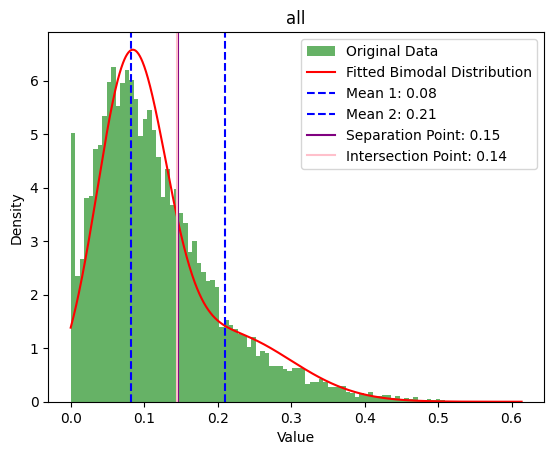

Mean 1: 0.08
Mean 2: 0.21
Separation Point: 0.15
Intersection Point: 0.14
Meadian Point: 0.10


In [22]:
# clustering immune
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

immune_df = pd.read_csv("gene/data/tcga_all_immune.csv")
immune_df["TCGA Study"] = immune_df["TCGA Study"].replace(["COAD", "READ"], "COADREAD")
immune_df["TCGA Study"] = immune_df["TCGA Study"].replace(["GBM", "LGG"], "GBMLGG")


mitosis_feats = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer.csv')
mitosis_feats["type"] = mitosis_feats["type"].replace(["COAD", "READ"], "COADREAD")
mitosis_feats["type"] = mitosis_feats["type"].replace(["GBM", "LGG"], "GBMLGG")

cancer_list = list(mitosis_feats["type"].unique())

def find_cut_off(data, round_it=True):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    if round_it:
        separation_point = np.round(separation_point)

    return separation_point
    
for cancer_type in ["all"]:
    print(cancer_type)
    # if cancer_type == "All":
    #     mitosis_feats_cancer = mitosis_feats[mitosis_feats["type"].isin(ALL_CANCERS)]
    #     gene_exp_cancer = immune_df[immune_df["TCGA Study"].isin(ALL_CANCERS)]
    # else:
    #     mitosis_feats_cancer = mitosis_feats[mitosis_feats["type"]==cancer_type]
    #     gene_exp_cancer = immune_df[immune_df["TCGA Study"]==cancer_type]


    # # drop missing mutations
    # gene_exp_cancer = gene_exp_cancer.dropna(axis=1, how="all")
    # # drop cases with all mutations as Nan


    # # Find the common case names between mitosis features and gene expressions
    # common_cases = pd.Series(list(set(mitosis_feats_cancer['bcr_patient_barcode']).intersection(set(gene_exp_cancer['TCGA Participant Barcode']))))
    # ## Keep only the rows with the common case names in both dataframes
    # df1_common = mitosis_feats_cancer[mitosis_feats_cancer['bcr_patient_barcode'].isin(common_cases)]
    # df2_common = gene_exp_cancer[gene_exp_cancer['TCGA Participant Barcode'].isin(common_cases)]
    # df2_common = df2_common.drop_duplicates(subset='TCGA Participant Barcode')

    # ## Sort the dataframes based on 'case_name'
    # df1_common = df1_common.sort_values('bcr_patient_barcode')
    # df2_common = df2_common.sort_values('TCGA Participant Barcode')

    # df1_common = df1_common.reset_index(drop=True)
    # df2_common = df2_common.reset_index(drop=True)

    # data = pd.concat([df1_common["temperature"], df2_common[["T Cells CD8"]]], axis=1)

    if cancer_type != "all":
        data = immune_df[immune_df["TCGA Study"]==cancer_type]
    else:
        data = immune_df[immune_df["TCGA Study"].isin(cancer_list)]
    data = data[["T Cells CD8"]].dropna()
    # data = data.dropna()
    data = data["T Cells CD8"].values.reshape(-1, 1) # mit_hotspot_count
    # Fit a Gaussian Mixture Model (GMM) to the data with 2 components (for bimodal)
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    # Get the means and variances of the two Gaussian components
    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    mean1, mean2 = np.sort(means)
    var1, var2 = variances[np.argsort(means)]

    # Solve for the intersection of the two Gaussian distributions
    a = 1/(2*var1) - 1/(2*var2)
    b = mean2/var2 - mean1/var1
    c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

    # The quadratic formula to find the intersection points
    roots = np.roots([a, b, c])
    intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0]

    # Generate values for plotting the fitted bimodal distribution
    x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
    logprob = gmm.score_samples(x)
    pdf = np.exp(logprob)

    # Plot original data distribution as a histogram
    plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Original Data')

    # Plot the fitted bimodal distribution
    plt.plot(x, pdf, 'r-', label='Fitted Bimodal Distribution')

    # Plot the means of the two distributions as vertical lines
    plt.axvline(mean1, color='blue', linestyle='--', label=f'Mean 1: {mean1:.2f}')
    plt.axvline(mean2, color='blue', linestyle='--', label=f'Mean 2: {mean2:.2f}')

    # Plot the separation point as a vertical line
    plt.axvline(separation_point, color='purple', linestyle='-', label=f'Separation Point: {separation_point:.2f}')
    plt.axvline(intersection_point, color='pink', linestyle='-', label=f'Intersection Point: {intersection_point:.2f}')

    # Add labels and legend
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(cancer_type)
    plt.legend()

    # Show the plot
    plt.show()

    # Print the means and separation point
    print(f"Mean 1: {mean1:.2f}")
    print(f"Mean 2: {mean2:.2f}")
    print(f"Separation Point: {separation_point:.2f}")
    print(f"Intersection Point: {intersection_point:.2f}")
    print(f"Meadian Point: {np.median(data):.2f}")

In [6]:
# Finding immune hot/cold based on T Cells CD8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

immune_df = pd.read_csv("gene/data/tcga_all_immune.csv")
immune_df["TCGA Study"] = immune_df["TCGA Study"].replace(["COAD", "READ"], "COADREAD")
immune_df["TCGA Study"] = immune_df["TCGA Study"].replace(["GBM", "LGG"], "GBMLGG")


mitosis_feats = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer_withAtypical.csv')
mitosis_feats["type"] = mitosis_feats["type"].replace(["COAD", "READ"], "COADREAD")
mitosis_feats["type"] = mitosis_feats["type"].replace(["GBM", "LGG"], "GBMLGG")

cancer_list = list(mitosis_feats["type"].unique())

# Load your dataset
df = immune_df.copy()

# Function to find the best separation point using Gaussian Mixture Model
def find_cut_off(data, round_it=True):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    mean1, mean2 = np.sort(means)
    var1, var2 = variances[np.argsort(means)]

    # Solve for the intersection of the two Gaussian distributions
    a = 1/(2*var1) - 1/(2*var2)
    b = mean2/var2 - mean1/var1
    c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

    # The quadratic formula to find the intersection points
    roots = np.roots([a, b, c])
    intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0] 

    if round_it:
        intersection_point = np.round(intersection_point)

    return intersection_point

# Initialize a new column 'temperature' to store the classification
df['T_Cells_CD8_temperature'] = np.nan

# Loop through each cancer type
for cancer_type in cancer_list:
    # Filter data for the specific cancer type
    data = df[df["TCGA Study"] == cancer_type]
    data = data[["T Cells CD8"]].dropna()
    # Get the 'mit_hotspot_count' values and reshape them for GMM
    mit_hotspot_data = data["T Cells CD8"].values.reshape(-1, 1)
    
    # Calculate the separation point using GMM
    separation_point = find_cut_off(mit_hotspot_data, round_it=False)
    print(cancer_type, separation_point)
    
    # Update the temperature column based on the separation point
    df.loc[data.index, "T_Cells_CD8_temperature"] = np.where(
        df.loc[data.index, "T Cells CD8"] >= separation_point, 'Hot', 'Cold'
    )

# Save the updated DataFrame if needed
df.to_csv("gene/data/tcga_all_immune_new.csv", index=False)



LUAD 0.11265948422512115
GBMLGG 0.06573974886495294
SARC 0.11148074954127964
COADREAD 0.13990715153510797
BRCA 0.11310901509307467
STAD 0.1383705385720045


/tmp/ipykernel_3510817/4097074086.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Cold' 'Cold' 'Cold' 'Cold' 'Hot' 'Hot' 'Cold' 'Cold' 'Cold' 'Cold' 'Hot'
 'Hot' 'Cold' 'Hot' 'Cold' 'Cold' 'Cold' 'Cold' 'Hot' 'Hot' 'Hot' 'Cold'
 'Hot' 'Cold' 'Hot' 'Hot' 'Cold' 'Cold' 'Hot' 'Cold' 'Cold' 'Cold' 'Cold'
 'Cold' 'Hot' 'Hot' 'Cold' 'Hot' 'Hot' 'Hot' 'Hot' 'Cold' 'Cold' 'Cold'
 'Cold' 'Cold' 'Cold' 'Hot' 'Cold' 'Cold' 'Cold' 'Cold' 'Cold' 'Cold'
 'Hot' 'Hot' 'Cold' 'Cold' 'Cold' 'Hot' 'Hot' 'Cold' 'Cold' 'Hot' 'Cold'
 'Hot' 'Hot' 'Cold' 'Cold' 'Cold' 'Cold' 'Cold' 'Cold' 'Cold' 'Hot' 'Cold'
 'Cold' 'Cold' 'Hot' 'Cold' 'Hot' 'Hot' 'Cold' 'Cold' 'Cold' 'Hot' 'Cold'
 'Cold' 'Cold' 'Cold' 'Cold' 'Cold' 'Hot' 'Cold' 'Cold' 'Cold' 'Hot'
 'Cold' 'Cold' 'Cold' 'Cold' 'Cold' 'Cold' 'Cold' 'Hot' 'Hot' 'Cold'
 'Cold' 'Cold' 'Hot' 'Hot' 'Cold' 'Hot' 'Cold' 'Cold' 'Cold' 'Cold' 'Cold'
 'Cold' 'Cold' 'Hot' 'Cold' 'Hot' 'Cold' '

KIRC 0.21805845290035558
THCA 0.13608685903717088
BLCA 0.14250539733466777
ACC 0.11880402598423367
CESC 0.17527584301981602
PAAD 0.10629038393481381
OV 0.09875729751156678
SKCM 0.18646288613822487
UCEC 0.16487316691555406
LIHC 0.1652035533326453
ESCA 0.11030772948293331
HNSC 0.12071672116107703
LUSC 0.13207469105154074
TGCT 0.13049294040550638
KIRP 0.13731404942188416
MESO 0.1413320365300266
PCPG 0.11957107644965922
CHOL 0.15984487005889425
PRAD 0.14944800468462727
KICH 0.08493408270865781
THYM 0.2549343006745794
DLBC 0.12464402956820166
UVM 0.1196491293290241
UCS 0.13180859354095534


In [1]:
# adding new relative immune measures to the immune resource
import pandas as pd

immune_df = pd.read_csv("gene/data/tcga_all_immune_new.csv")
a = 0.001
# immune_df["Macrophages M1/M2 ratio"] = immune_df["Macrophages M1"]/(immune_df["Macrophages M2"]+a)
# immune_df["Macrophages M2/M1 ratio"] = immune_df["Macrophages M2"]/(immune_df["Macrophages M1"]+a)
# immune_df["T Cells CD4 Resting/Activated ratio"] = immune_df["T Cells CD4 Memory Resting"]/(immune_df["T Cells CD4 Memory Activated"]+a)
immune_df["Th1:Th2 cell ratio"] = immune_df["Th1 Cells"]/(immune_df["Th2 Cells"]+1)

# immune_df["Mast Cells Resting/Activated ratio"] = immune_df["Mast Cells Resting"]/(immune_df["Mast Cells Activated"]+a)
# immune_df["Dendritic Cells Resting/Activated ratio"] = immune_df["Dendritic Cells Resting"]/(immune_df["Dendritic Cells Activated"]+a)
# immune_df["NK Cells Resting/Activated ratio"] = immune_df["NK Cells Resting"]/(immune_df["NK Cells Activated"]+a)

# immune_df[["Macrophages M1/M2 ratio", "NK Cells Resting/Activated ratio", "NK Cells Resting", "NK Cells Activated"]]
# immune_df.to_csv("gene/data/tcga_all_immune_new.csv", index=False)


In [2]:
import pandas as pd
import numpy as np

# Assume immune_df is your DataFrame

# Step 1: Scale 'Th1 Cells' to [0, 1], ignoring NaNs
th1_min = immune_df["Macrophages M1"].min(skipna=True)
th1_max = immune_df["Macrophages M1"].max(skipna=True)
immune_df["Macrophages M1 Scaled"] = (immune_df["Macrophages M1"] - th1_min) / (th1_max - th1_min)

# Scale 'Th2 Cells' to [0, 1], ignoring NaNs
th2_min = immune_df["Macrophages M2"].min(skipna=True)
th2_max = immune_df["Macrophages M2"].max(skipna=True)
immune_df["Macrophages M2 Scaled"] = (immune_df["Macrophages M2"] - th2_min) / (th2_max - th2_min)

# Step 2: Define a small epsilon to prevent division by zero
epsilon = 1

# Step 3: Calculate the ratio only for valid rows
# This will automatically ignore rows with NaNs in either scaled column
immune_df["Macrophages M2:Th1 ratio"] = immune_df["Macrophages M2 Scaled"] / (immune_df["Macrophages M1 Scaled"] + epsilon)
immune_df.to_csv("gene/data/tcga_all_immune_new.csv", index=False)


In [ ]:
immune_df["Th1/Th2 cell ratio"]

In [21]:
df[df["TCGA Study"]=="UCS"][["T Cells CD8", "T_Cells_CD8_temperature"]].sort_values(by="T_Cells_CD8_temperature").dropna()

,T Cells CD8,T_Cells_CD8_temperature
946,0.101630,Cold
5418,0.054440,Cold
10912,0.096278,Cold
6549,0.021018,Cold
6552,0.044015,Cold
7623,0.110896,Cold
7624,0.076057,Cold
7625,0.105838,Cold
7626,0.006912,Cold
7627,0.047548,Cold


In [18]:
df["mit_hotspot_count"]

0       247
1       322
2       155
3       279
4       257
       ... 
9240      0
9241      0
9242      0
9243      0
9244      0
Name: mit_hotspot_count, Length: 9245, dtype: int64

In [ ]:
import matplotlib.pyploy as plt

plt.scatter()